<a href="https://colab.research.google.com/github/goitstudent123/python_data_science/blob/main/%D0%94%D0%979-%D0%93%D0%90%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\textbf{Змінні:} \quad
x_1 \; (\text{сайти}), \quad
x_2 \; (\text{інтернет-магазини}), \quad
x_3 \; (\text{інтеграції з ERP})
$$

$$
\textbf{Цільова функція (тис.\$):} \quad
\max Z = 2x_1 + 9x_2 + 6x_3
$$

$$
\textbf{Обмеження:}
\begin{cases}
12x_1 + 6x_2 + 2x_3 \le 320 & \text{(дизайнери, 2 \times 160 год)} \\
12x_1 + 24x_2 + 18x_3 \le 192 & \text{(розробники, 192 год)} \\
12x_1 + 18x_2 + 12x_3 \le 180 & \text{(тестувальники, 180 год)} \\
x_1 \ge 0,\; x_2 \ge 0,\; x_3 \ge 0
\end{cases}
$$

$$
\textbf{Розв'язання:} \quad
\text{Вузьке місце — ресурс розробників (192 год).}
$$

$$
\text{Віддача на 1 год розробника:} \quad
\frac{2}{12} \approx 0.167,\quad
\frac{9}{24} = 0.375,\quad
\frac{6}{18} \approx 0.333 \quad (\text{тис.\$/год})
$$

$$
\text{Максимум дає } x_2 \ (\text{інтернет-магазини}), \quad
24x_2 = 192 \Rightarrow x_2 = 8,\quad x_1 = 0,\quad x_3 = 0
$$

$$
\text{Перевірка:} \quad
\text{Дизайнери: } 6 \cdot 8 = 48 \le 320, \quad
\text{Тестувальники: } 18 \cdot 8 = 144 \le 180
$$

$$
\text{Оптимальний дохід:} \quad
Z^* = 2\cdot 0 + 9\cdot 8 + 6\cdot 0 = 72 \quad \text{тис.\$}
$$


Optimal: x1=0.00, x2=8.00, x3=0.00, Revenue=72.00k$


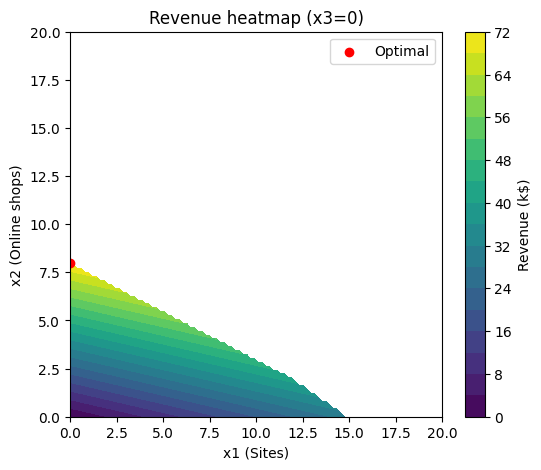

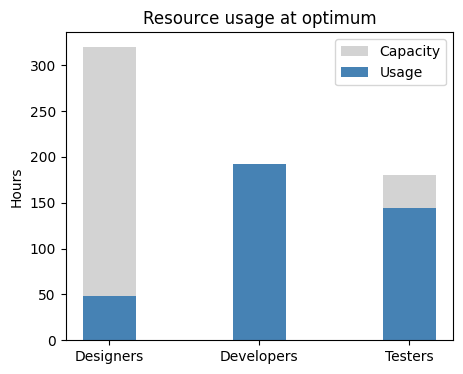

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Problem setup
c = -np.array([2, 9, 6], dtype=float)
A = np.array([
    [12,  6,  2],
    [12, 24, 18],
    [12, 18, 12],
], dtype=float)
b = np.array([320, 192, 180], dtype=float)
bounds = [(0, None), (0, None), (0, None)]

# Solve
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")
x_opt = res.x
revenue_opt = -res.fun

print(f"Optimal: x1={x_opt[0]:.2f}, x2={x_opt[1]:.2f}, x3={x_opt[2]:.2f}, Revenue={revenue_opt:.2f}k$")

# --- Heatmap for x1 vs x2 (assuming x3=0) ---
x1_vals = np.linspace(0, 20, 100)
x2_vals = np.linspace(0, 20, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Revenue = 2*X1 + 9*X2  # x3=0
# Feasibility mask (x3=0)
mask = (
    (12*X1 + 6*X2 <= 320) &
    (12*X1 + 24*X2 <= 192) &
    (12*X1 + 18*X2 <= 180)
)
Revenue_masked = np.where(mask, Revenue, np.nan)

plt.figure(figsize=(6,5))
plt.contourf(X1, X2, Revenue_masked, cmap="viridis", levels=20)
plt.colorbar(label="Revenue (k$)")
plt.scatter(x_opt[0], x_opt[1], color="red", label="Optimal")
plt.xlabel("x1 (Sites)")
plt.ylabel("x2 (Online shops)")
plt.legend()
plt.title("Revenue heatmap (x3=0)")
plt.show()

# --- Resource usage bar chart ---
resources = ["Designers", "Developers", "Testers"]
usage = A @ x_opt
capacity = b

plt.figure(figsize=(5,4))
bar_width = 0.35
plt.bar(resources, capacity, width=bar_width, label="Capacity", color="lightgray")
plt.bar(np.arange(len(resources)), usage, width=bar_width, label="Usage", color="steelblue")
plt.ylabel("Hours")
plt.title("Resource usage at optimum")
plt.legend()
plt.show()
